<a href="https://colab.research.google.com/github/Bettyyoungarney/Test-project/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning-Kmeans Cluster



In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
data = {
    'Player': [
        'Joe Root', 'Ben Stokes', 'Jofra Archer', 'Jos Buttler', 'Chris Woakes',
        'Moeen Ali', 'James Anderson', 'Stuart Broad', 'Jonny Bairstow', 'Sam Curran',
        'Dawid Malan', 'Ollie Robinson', 'Mark Wood', 'Liam Livingstone', 'Adil Rashid'
    ],
    'Runs': [11000, 6000, 500, 4500, 3000, 3000, 650, 800, 5500, 1500, 2000, 300, 400, 1000, 1000],
    'Wickets': [50, 150, 90, 10, 150, 200, 680, 600, 5, 100, 2, 75, 120, 15, 250]
}

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head()

,Player,Runs,Wickets
0,Joe Root,11000,50
1,Ben Stokes,6000,150
2,Jofra Archer,500,90
3,Jos Buttler,4500,10
4,Chris Woakes,3000,150


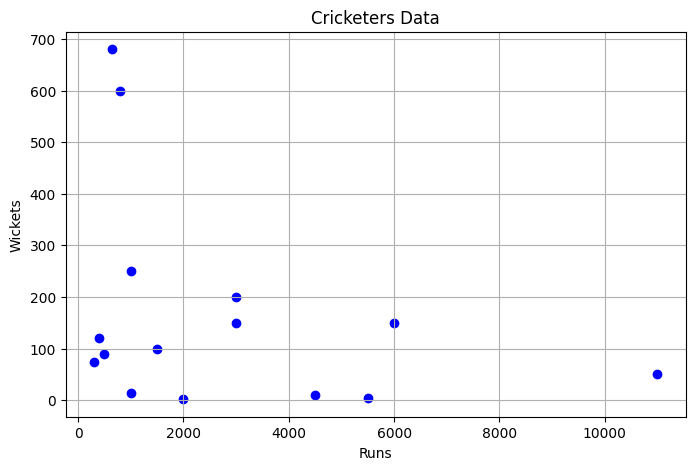

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Runs'], df['Wickets'], color='blue')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.title('Cricketers Data')
plt.grid(True)




In [ ]:
x=df[['Runs','Wickets']]


In [ ]:
kmeans=KMeans(n_clusters=3)
df['Cluster']= kmeans.fit_predict(x)

In [ ]:
df.head(10)

,Player,Runs,Wickets,Cluster
0,Joe Root,11000,50,1
1,Ben Stokes,6000,150,1
2,Jofra Archer,500,90,0
3,Jos Buttler,4500,10,2
4,Chris Woakes,3000,150,2
5,Moeen Ali,3000,200,2
6,James Anderson,650,680,0
7,Stuart Broad,800,600,0
8,Jonny Bairstow,5500,5,1
9,Sam Curran,1500,100,0


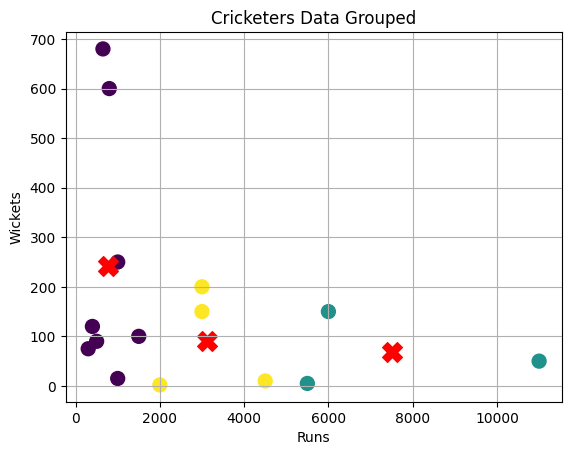

In [ ]:
plt.scatter(df['Runs'], df['Wickets'], c=df['Cluster'], s=100)
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], color='red', s=200, marker='X')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.title('Cricketers Data Grouped')
plt.grid(True)

# Insights

Most of the cricketers have a very low run scores

A few has medium scores while just one cricketer has a very high run score.

In [ ]:
df=pd.read_csv('/content/cricket-players.csv')

In [ ]:
df.head()

,Player Name,Runs,Wickets
0,Virat Kohli,25583,0
1,Rohit Sharma,18325,0
2,Kane Williamson,17306,0
3,Joe Root,19671,0
4,Steve Smith,18193,0


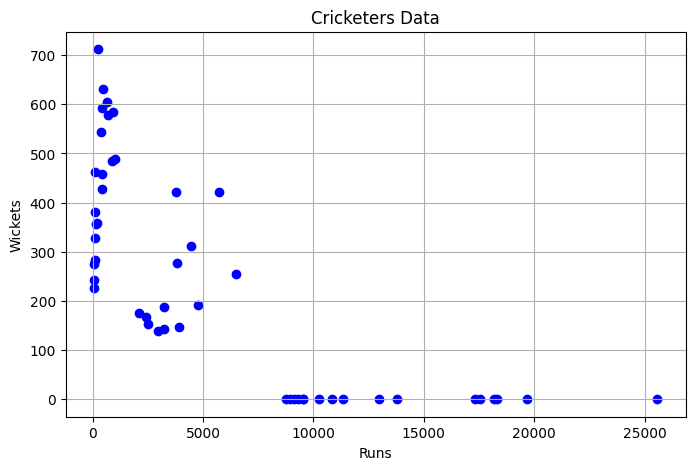

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Runs'], df['Wickets'], color='blue')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.title('Cricketers Data')
plt.grid(True)

In [ ]:
x=df[['Runs','Wickets']]

In [ ]:
Kmeans=KMeans(n_clusters=3)
df['Cluster']=Kmeans.fit_predict(x)

In [ ]:
df.head()

,Player Name,Runs,Wickets,Cluster
0,Virat Kohli,25583,0,1
1,Rohit Sharma,18325,0,1
2,Kane Williamson,17306,0,1
3,Joe Root,19671,0,1
4,Steve Smith,18193,0,1


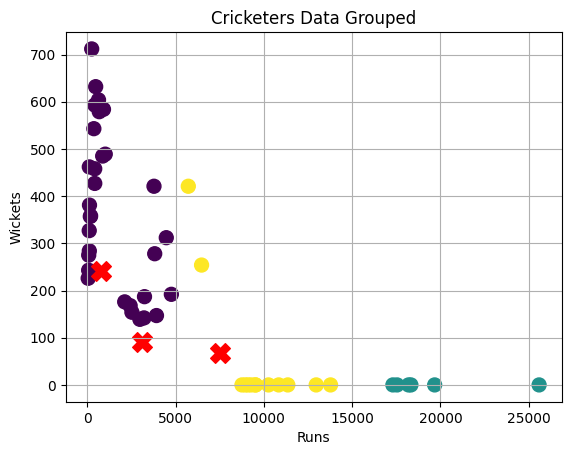

In [ ]:
plt.scatter(df['Runs'], df['Wickets'], c=df['Cluster'], s=100)
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], color='red', s=200, marker='X')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.title('Cricketers Data Grouped')
plt.grid(True)

# Scaling

Scaling means shrinking up or down the values, also known as normalizing the values. Hence it puts all the values between two ranges, +1 to -1 so that they will be in the same range in determining the group.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Step 1: Perform scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Runs', 'Wickets']])

In [ ]:
scaled_data

array([[ 3.06899056, -1.10266163],
       [ 1.94515283, -1.10266163],
       [ 1.78736961, -1.10266163],
       [ 2.15356914, -1.10266163],
       [ 1.92471379, -1.10266163],
       [ 1.82406698, -1.10266163],
       [ 1.24078003, -1.10266163],
       [ 1.11504894, -1.10266163],
       [ 0.86637391, -1.10266163],
       [ 0.69682275, -1.10266163],
       [ 0.78663067, -1.10266163],
       [ 0.58316928, -1.10266163],
       [ 0.51782627, -1.10266163],
       [ 0.58270475, -1.10266163],
       [ 0.49382588, -1.10266163],
       [ 0.54507833, -1.10266163],
       [ 0.46456089, -1.10266163],
       [ 0.11043897,  0.06335025],
       [-0.19893383,  0.32960494],
       [-0.30035485,  0.1735246 ],
       [-0.00584681,  0.82998011],
       [-0.1544944 , -0.22126682],
       [-0.28487072, -0.42784373],
       [-0.30670334,  0.82998011],
       [-0.38985308, -0.24421981],
       [-0.50025489, -0.39570955],
       [-0.56343011, -0.29471639],
       [-0.39434348, -0.45079672],
       [-0.43026665,

In [ ]:
sse=[] # Error

In [ ]:
k=range(2,11) #2,3, 4...10
for k_elbow in k:
 k_means_elbow=KMeans(n_clusters=k_elbow, n_init=10)
 k_means_elbow.fit(scaled_data)
 sse.append(k_means_elbow.inertia_)

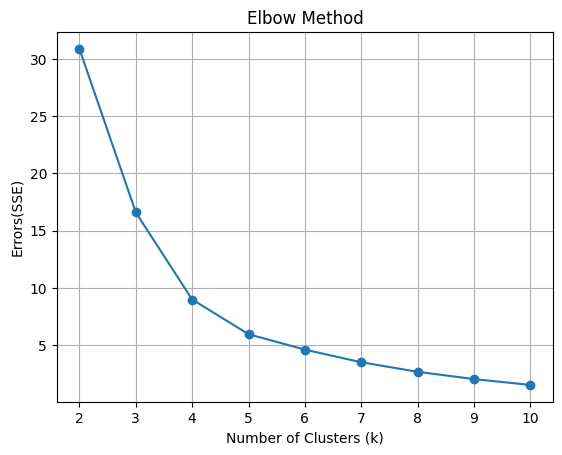

In [ ]:
plt.plot(k, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Errors(SSE)')
plt.title('Elbow Method')
plt.xticks(k)
plt.grid(True)

In [ ]:
kmeans = KMeans(n_clusters=5)
df['Cluster']= kmeans.fit_predict(scaled_data)

In [ ]:
# Note, we cannot directly plot the centers because they have been transformed into zeros and 1's(within the range of -1 to +1), so we need to reverse them first.
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)

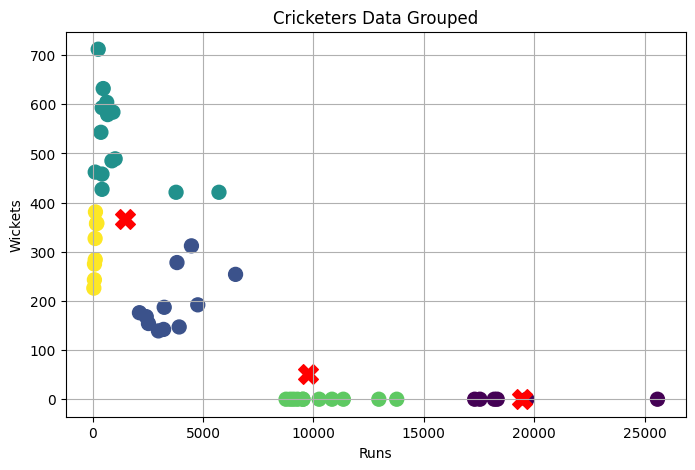

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Runs'], df['Wickets'], c=df['Cluster'], s=100, cmap='viridis')
centers = Kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], color='red', s=200, marker='X')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.title('Cricketers Data Grouped')
plt.grid(True)

# Inference
The blue colored points have high number of wickets
The yelow colored points have some number of wickets and some Runs also.
The purple colored points have zero number of wickets but high number of Runs

# Applying Kmeans to images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

In [ ]:
image_path=('/content/Passport -Praise George.jpg')

In [ ]:
k=5

In [ ]:
img=Image.open(image_path)

In [ ]:
img.resize((200,200))
img_array=np.array(img) # convert image pixels to numbers

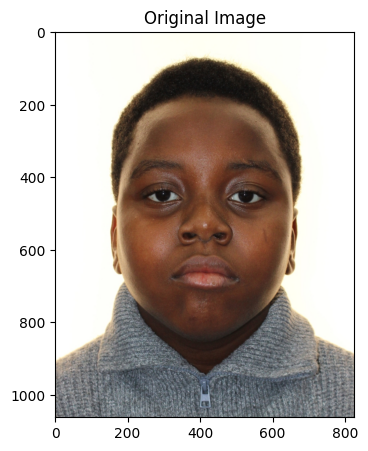

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(img_array)
plt.title('Original Image')
plt.show()

In [ ]:
img_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 88,  93,  97],
        [ 72,  73,  77],
        [ 73,  68,  72],
        ...,
        [100,  99, 104],
        [ 91,  90,  96],
        [ 93,  92,  98]],

       [[ 99, 107, 109],
        [ 81,  85,  88],
        [ 83,  81,  86],
        ...,
        [ 89,  93,  96],
        [ 82,  83,  88],
        [ 81,  82,  87]],

       [[131, 140, 139],
        [115, 121, 121],
        [114, 113, 119],
        ...,
        [ 87,  92,  95],
        [ 86,  87,  92],
        [ 81,  82,  87]]

In [ ]:
h, w, c = img_array.shape

In [ ]:
pixels = img_array.reshape(h*w, c) # convert the multiple level of numbers to one straight

In [ ]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(pixels) # Each pixel will have a label, team 1, 2, 3...5

In [ ]:
segmented_image = kmeans.cluster_centers_[labels].reshape(h,w,c).astype(np.uint8) # To convert into appropriate color formating

Text(0.5, 1.0, 'Segmented Image')

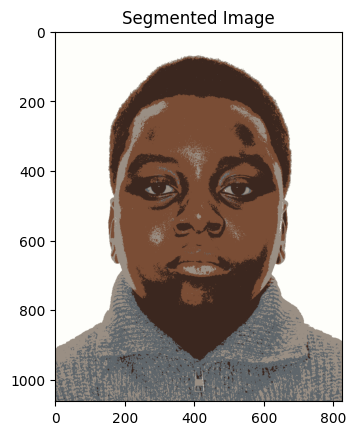

In [ ]:
plt.imshow(segmented_image)
plt.title('Segmented Image')# Similar pixels has been put into similar groups

# Segmenting medical image

In [ ]:
pip install pydicom # a medical image liabrary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
import pydicom

In [ ]:
pydicom_path=('/content/Vida_Head.MR.Comp_DR-Gain_DR.1005.1.2021.04.27.14.20.13.818.14380335 (1) (1).dcm')

In [ ]:
dataset=pydicom.dcmread(pydicom_path)

In [ ]:
img_array=dataset.pixel_array.astype(float)

In [ ]:
img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))

Text(0.5, 1.0, 'Original Image')

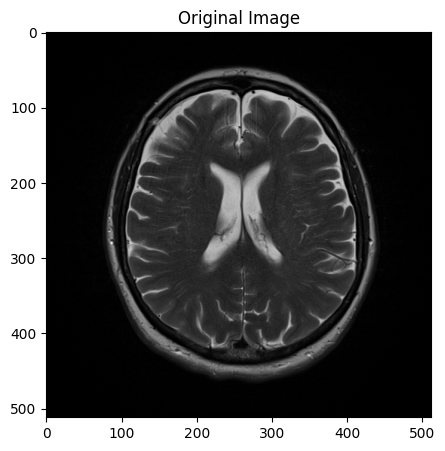

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(img_array, cmap='gray')
plt.title('Original Image') # The cells having similar color, would belong to same group of similarities

In [ ]:
h,w=img_array.shape
pixels= img_array.reshape(h*w,1)

#Elbow Method

In [ ]:
sse=[] # sse means Sum of Squared Error

In [ ]:
k=range(2,11) #2,3, 4...10
for k_elbow in k:
 k_means_elbow=KMeans(n_clusters=k_elbow, n_init=10)
 k_means_elbow.fit(pixels)
 sse.append(k_means_elbow.inertia_)

In [ ]:
import matplotlib.pyplot as plt

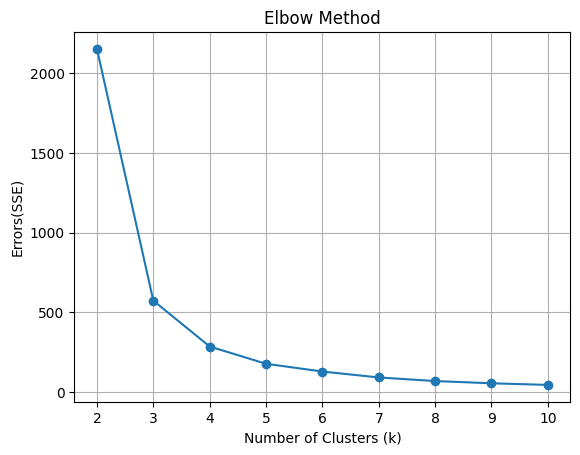

In [ ]:
plt.plot(k, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Errors(SSE)')
plt.title('Elbow Method')
plt.xticks(k)
plt.grid(True)

In [ ]:
k-4
kmeans=KMeans(n_clusters=4)
labels=kmeans.fit_predict(pixels)
segmented_image=kmeans.cluster_centers_[labels].reshape(h,w)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

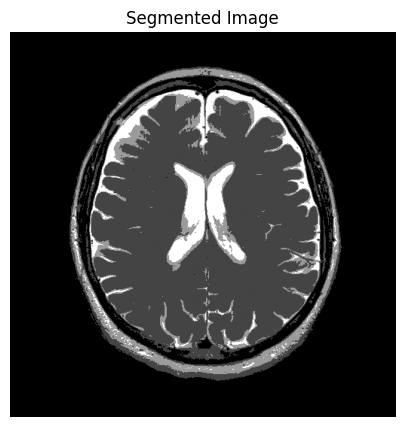

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

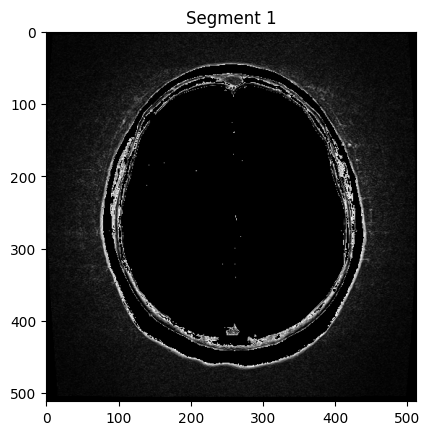

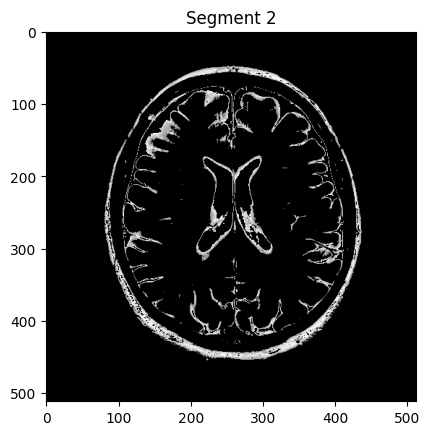

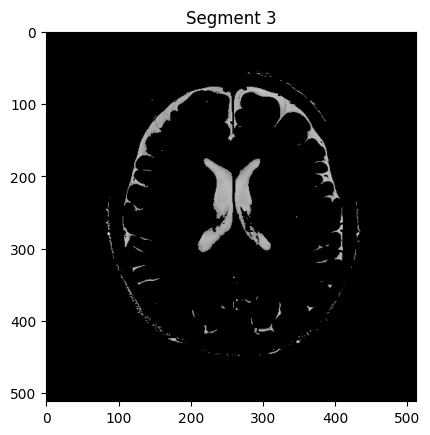

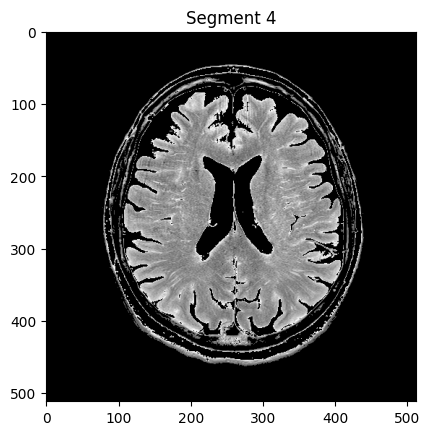

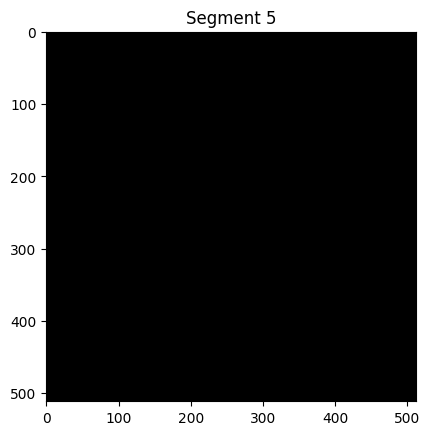

In [ ]:
for i in range(k):
  cluster_mask = (labels.reshape(h,w)==i)
  segment = img_array * cluster_mask

  plt.figure()
  plt.imshow(segment, cmap=plt.cm.gray)
  plt.title(f"Segment {i+1}")

#Inference
Our model has correctly identified all the pixels belonging to a particular part of the brain.Kmeans was able to find the similarities on the basis of their colors belonging to different parts of the brain. Hence a simple unsupervised algorithm such as Kmeans clustering have very powerful application in medical image analysis.